## Introduction to Base Editors and gRNA Design
---

### 1. Introduction to Base Editors
Base Editors (BEs) are a class of genome editing tools derived from CRISPR systems. Unlike traditional CRISPR/Cas9, which introduces double-strand breaks in DNA, base editors enable precise nucleotide changes without causing breaks in the DNA utilising a modified Cas9 protein (dCas9) and enzymes deaminate the nucleotides.

Current base editors are:

- Cytosine Base Editors (CBEs): Converts C•G to T•A base pairs.
- Adenine Base Editors (ABEs): Converts A•T to G•C base pairs.


---
### What is a gRNA?

Guide RNA (gRNA) is a short piece of RNA that guides the base editor complex to sequence intended to modify. The gRNA is designed to match the target DNA sequence, and its accuracy is critical for successful base editing.

The gRNA in Base Editor composed of a protospacer sequence including activity window and a PAM sequence.

- Protospacer Adjacent Motif (PAM) Sequence: The PAM is a short DNA sequence that must be adjacent to the target site for the base editor to bind.
- Protospacer sequence: The protospacer sequence is the adjacent sequence to the PAM and includes the activity window.
- Activity window (editing window): The activity window is where the base editor can change nucleotides. CBEs and ABEs can edit cytosines and adenines within the activity window.

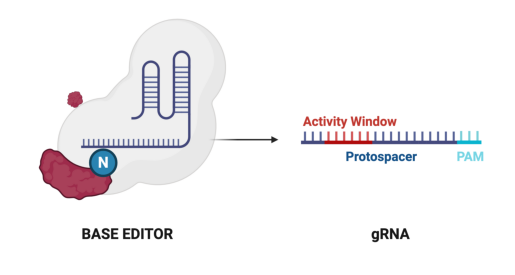

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/figures/gRNA.png')
plt.imshow(img)
plt.axis('off')
plt.show()

---
### 3. Designing gRNAs for Base Editors

ThroughtoutIn this course, we will use [BEstimate](https://github.com/CansuDincer/BEstimate) which is a Python-based Base Editor gRNA design tool.

To find the most appropriate gRNA for our experiments, we should decide:

1. Length of the protospacer and PAM sequences
  - Typically the protospacer sequence is 20.
  - PAM is more divergent however the most frequently used one is NGG or NG so (3 or 2)
2. The sequence interval of the activity window.
  - Typically activity window reside 3-9 nucleotides within the protospacer sequence.
3. The editable nucleotides
  - CBE or ABE
  - For a novel base editor, you can specify any nucleotide change

After the information related to Base Editors, you should also decide which gene is your interest:

1. Hugo symbol of the gene
2. (Optionally) Ensembl Transcript ID
3. (Optionally) Uniprot ID


---
### 4. Running BEstimate

BEstimate can only need to input initially, and return the output files. However for training purposes we will go through the steps:

#### 4.1. Identifying editable sequences

To identify the editable sequence, first BEstimate retrives the DNA sequenceof the given Hugo Symbol.

*Important note: Any alteration on the DNA sequence of the gene might effect the resulting Base Editor effect. Any single nucleotide change within the cell lines/organoids used in the experiment potentially disrupt PAM or protospacer sequeces. You can inform BEstimate about the SNPs found in the cell model, and BEstimate can edit the reference sequence.*

#### 4.2. gRNA identification

Across the prepared gene sequence, BEstimate finds the gRNA with editable nucleotides.

#### 4.3. In silico annotation of the gRNAs

Base editor can generate single nucleotide changes and this can lead to:

- Amino Acid Substitution: Modifying codons in the protein-coding sequence.
- Splice Site Modification: Disrupting or creating splicing sites to alter mRNA splicing.
- Gene Regulation Modifications: Targeting promoters, enhancers, or transcription factor binding sites.
- Start/Stop Codon Edits: Creating or preventing the translation of proteins.
- Disease Mutation Correction: Reversing mutations associated with genetic disorders.

For all this purposes, in silico annotation of BEstimate can be utilised. It also retrieves the location of the edit in protein sequences such as on which domains, whether it is on the post translational modification sites or protein interaction surfaces.  

#### 4.4. Off target effects of the gRNAs

Any nucleotide change outside of the intended sequence is called off-targets. Therefore, it is important to know how many location across the genome gRNA potentially can lead the Base Editor.

Bestimate uses [mrsfast](https://github.com/sfu-compbio/mrsfast) algorithm to find potential off-target sequences for any gRNA.

*Important note: Likewise the sequence design, BEstimate accept VCF file to generate cell model specific genome and then look for off-targets. Why it can be important, please check [Cancellieri, S. et al. (2023) Human genetic diversity alters off-target outcomes of therapeutic gene editing](https://https://www.nature.com/articles/s41588-022-01257-y)*

---
### 5. BEstimate

#### 5.1. Installing BEstimate

In order to run Bestimate, we need Python (version > 3.8

In [ ]:
# Download the BEstimate module from GitHub
!git clone https://github.com/CansuDincer/BEstimate.git

In [ ]:
!cd BEstimate

In [ ]:
# Install the conda environment necessary to run BEstimate
!conda-env create -n env_bestimate -f=bestimate.yml
# Then activate the environment
!conda activate env_bestimate

In [ ]:
# Later install remaining packages which is essential to run BEstimate
!pip3 install pandas argparse requests biopython

**Now you are ready to run BEstimate and design your gRNAs.**

#### 5.2. Running BEstimate

**Please do not run this script now, since it can take long time to finish. These are example for you to try later.**


- Let's find gRNAs which can target *BRAF* gene on GRCh38 Ensembl genome  assembly with CBE base editor with a preference to NGG PAM sequence. Here the protospacer length is assigned as 20 and PAM sequence concordantly became 21 to 23 as NGN. The activity window is selected as 3-9.
```
python3 BEstimate.py -gene BRAF -assembly GRCh38 -pamseq NGG -pamwin 21-23 -actwin 4-8 -protolen 20 -edit C -edit_to T -vep -ot -mm 3 -o ./output/ -ofile BRAF_CBE_NGG
```

- You can run BEstimate with a specific point mutation on *PIK3CA" gene with a  NGN base editor.
```
python3 BEstimate.py -gene PIK3CA -assembly GRCh38 -pamseq NGN -pamwin 21-23 -actwin 4-8 -protolen 20 -mutation '3:g.179218303G>A' -edit A -edit_to G  -ofile ./PIK3CA_NGN_ABE_mE545K -o ./output/
```


#### 5.3. Investigation of BEstimate output



In [ ]:
# gRNA files
pandas.read_csv()